In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("datasets_222487_478477_framingham.csv")

In [2]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [4]:
# Since the average and median values are close in most variables, I filled the nan values according to the median.

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'median')
imputer.fit(df.iloc[:,:-1].values)
df.iloc[:,:-1] = imputer.transform(df.iloc[:,:-1].values)

In [5]:
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

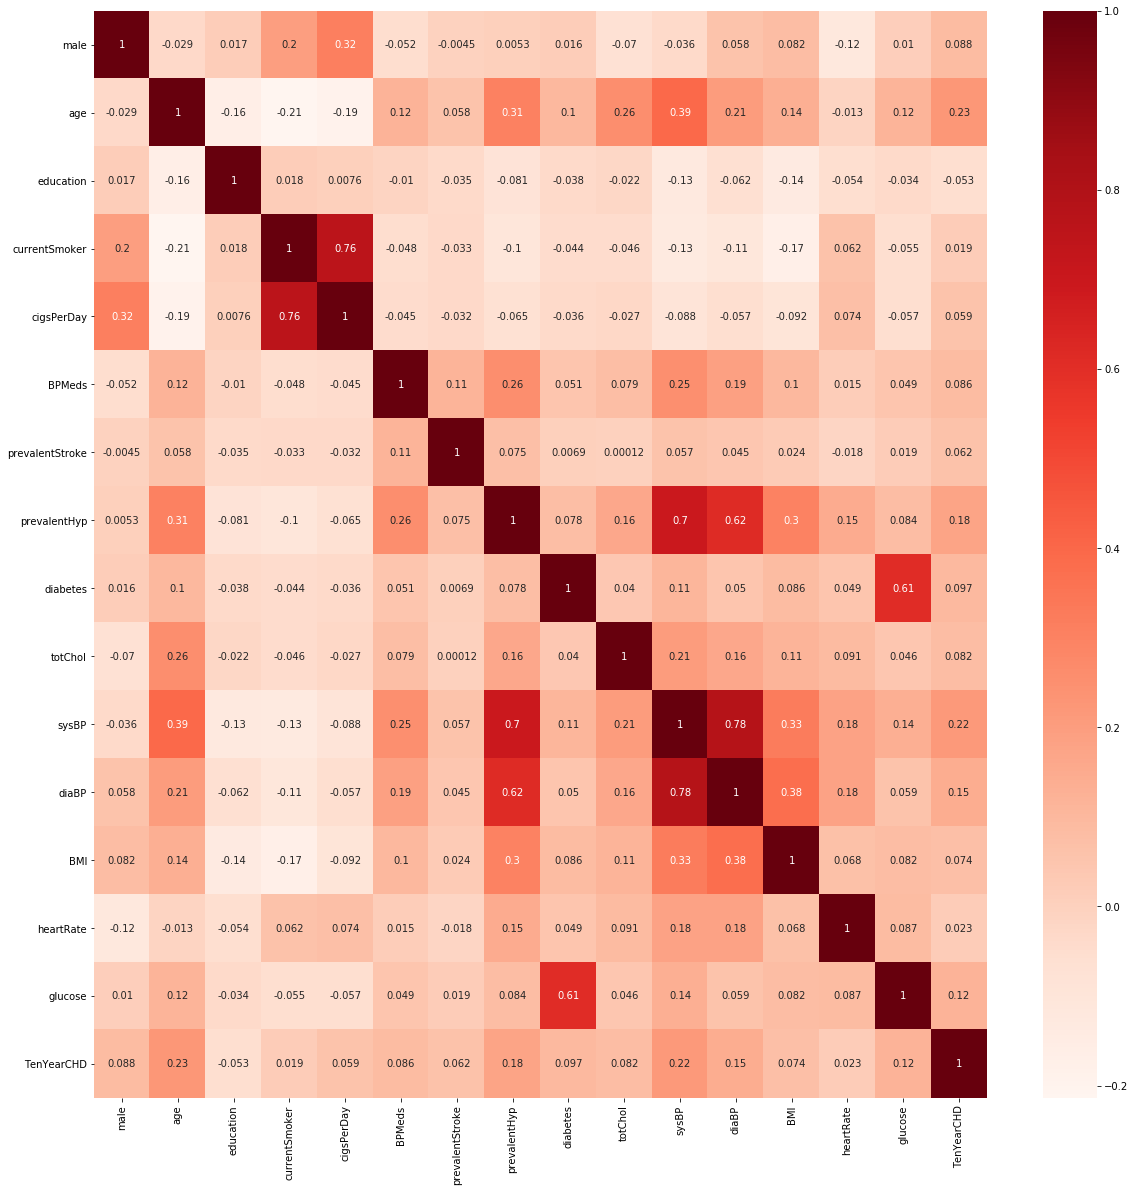

In [7]:
plt.figure(figsize=(20,20))
cor = df.corr()
sns_heat=sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
fig=sns_heat.get_figure
plt.show()

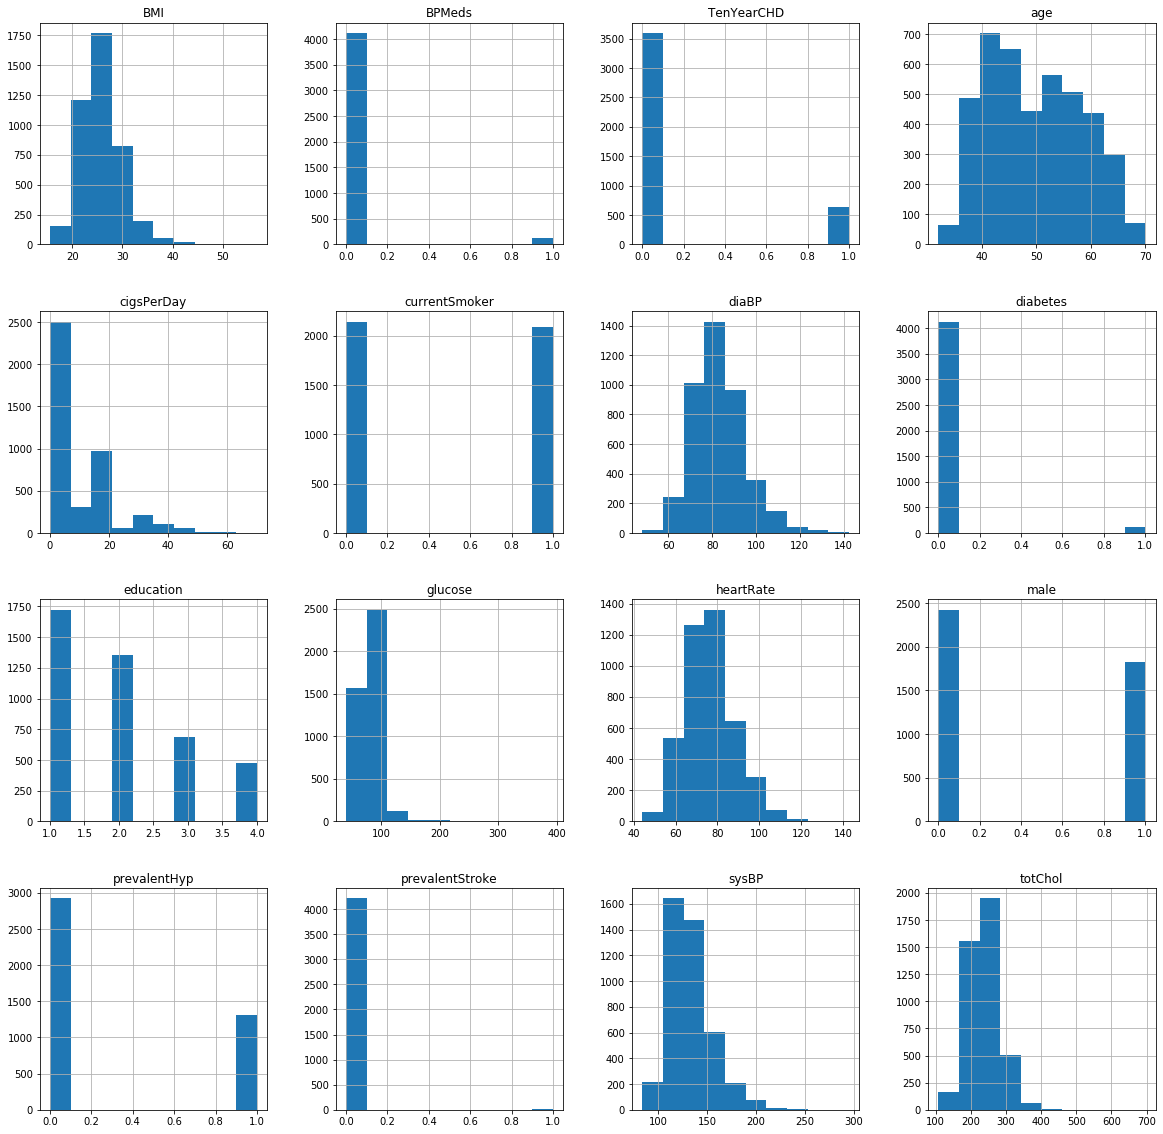

In [8]:
df.hist(figsize=(20, 20))
plt.show()

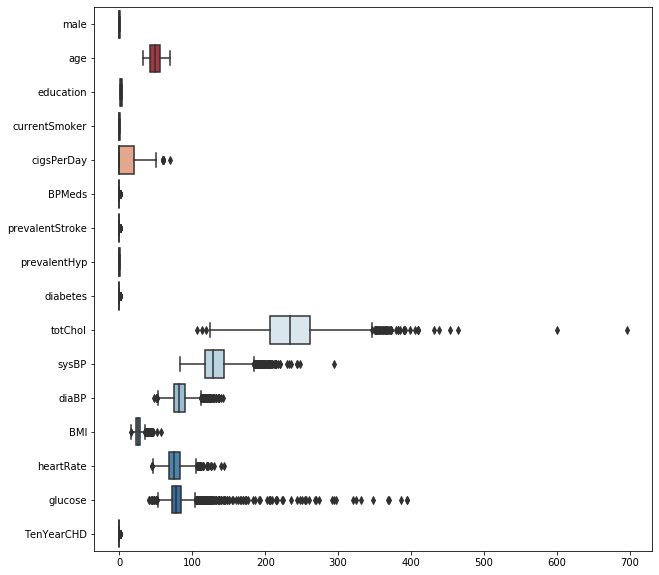

In [9]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df,palette='RdBu',orient='h')

In [10]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [11]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2,random_state=0)

In [12]:
from sklearn.preprocessing import StandardScaler
stdc = StandardScaler()
X_train = stdc.fit_transform(X_train)
X_test = stdc.transform(X_test)

In [13]:
from sklearn.metrics import roc_curve,roc_auc_score,classification_report,accuracy_score

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression().fit(X_train, y_train)

preds = lr.predict(X_test)
print(classification_report(y_test, preds))

precision    recall  f1-score   support

           0       0.85      1.00      0.92       710
           1       0.82      0.07      0.12       138

    accuracy                           0.85       848
   macro avg       0.83      0.53      0.52       848
weighted avg       0.84      0.85      0.79       848



AUC: 0.74


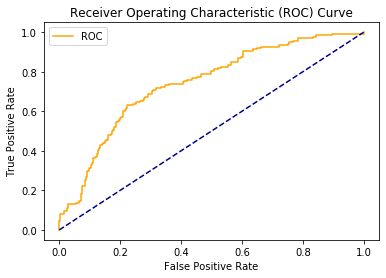

In [14]:
import numpy as np


def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    
probs = lr.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr)

In [15]:
cross_val_score(lr,X_test,y_test,cv=10).mean()

0.832549019607843

In [16]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier().fit(X_train,y_train)
result = knn.predict(X_test)
print(classification_report(y_test, result))


precision    recall  f1-score   support

           0       0.85      0.98      0.91       710
           1       0.48      0.09      0.15       138

    accuracy                           0.84       848
   macro avg       0.66      0.53      0.53       848
weighted avg       0.79      0.84      0.79       848



AUC: 0.64


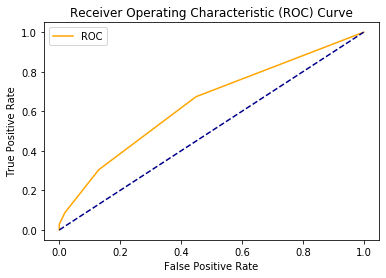

In [17]:
#ROC
probs = knn.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr)

In [18]:
#Knn model tuning
knn_params ={"n_neighbors": np.arange(1,10), "metric": ["euclidean","minkowski","manhattan"]}
knn_cv_model = GridSearchCV(knn,knn_params, cv=10,n_jobs=-1, verbose=2).fit(X_train,y_train)
knn_cv_model.score(X_test,y_test)

Fitting 10 folds for each of 27 candidates, totalling 270 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:   14.2s finished


0.839622641509434

In [19]:
knn_cv_model.best_params_

{'metric': 'euclidean', 'n_neighbors': 8}

In [20]:
knn_tuned = KNeighborsClassifier(metric='euclidean',n_neighbors=8).fit(X_train,y_train)

result = knn_tuned.predict(X_test)

print(classification_report(y_test, result))


precision    recall  f1-score   support

           0       0.84      1.00      0.91       710
           1       0.67      0.03      0.06       138

    accuracy                           0.84       848
   macro avg       0.75      0.51      0.48       848
weighted avg       0.81      0.84      0.77       848



AUC: 0.65


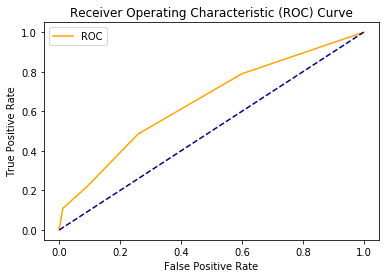

In [21]:
#ROC
probs = knn_tuned.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr)

In [22]:
from sklearn.svm import SVC
svm_model = SVC().fit(X_train,y_train)
result = svm_model.predict(X_test)
print(classification_report(y_test, result))

precision    recall  f1-score   support

           0       0.84      1.00      0.91       710
           1       1.00      0.01      0.01       138

    accuracy                           0.84       848
   macro avg       0.92      0.50      0.46       848
weighted avg       0.86      0.84      0.77       848



In [27]:
#svm model tuning
svm = SVC() 
svm_params ={"C": [0.1,1,2,3],"kernel": ["rbf","poly"],"degree" : [0, 1, 2,3,4]}
svm_cv_model = GridSearchCV(svm,svm_params,cv=10, n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 10 folds for each of 40 candidates, totalling 400 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   21.8s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  1.3min finished


In [28]:
svm_cv_model.best_score_

0.8519174041297936

In [29]:
svm_cv_model.best_params_

{'C': 2, 'degree': 3, 'kernel': 'poly'}

In [30]:
#final model
svm_tuned = SVC(C=2, kernel= "poly",degree=3).fit(X_train,y_train)
result = svm_tuned.predict(X_test)
print(classification_report(y_test, result))
accuracy_score(y_test,result)

precision    recall  f1-score   support

           0       0.85      0.99      0.92       710
           1       0.68      0.11      0.19       138

    accuracy                           0.85       848
   macro avg       0.77      0.55      0.55       848
weighted avg       0.82      0.85      0.80       848



0.8466981132075472

In [66]:
from sklearn.neural_network import MLPClassifier

mlpc_model = MLPClassifier(activation="logistic").fit(X_train,y_train)
result = mlpc_model.predict(X_test)
accuracy_score(y_test,result)

0.8443396226415094

In [67]:
mlpc_params={"alpha": [0.1,0.01,0.03],"hidden_layer_sizes": [(10,10),(100,100,100),(3,5)],"solver": ["lbfgs","adam"]}

In [52]:
#mlpc tuning
mlpc=MLPClassifier()
mlpc_cv_model = GridSearchCV(mlpc,mlpc_params ,cv=5,n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   54.9s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  2.5min finished


In [68]:
mlpc_cv_model.best_estimator_

MLPClassifier(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(3, 5), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [69]:
mlpc_cv_model.best_params_

{'alpha': 0.01, 'hidden_layer_sizes': (3, 5), 'solver': 'lbfgs'}

In [70]:
#mlpc tuned
mlpc_tuned = MLPClassifier(activation="logistic",alpha=0.01,hidden_layer_sizes=(3,5),solver="lbfgs").fit(X_train,y_train)
result = mlpc_tuned.predict(X_test)
accuracy_score(y_test,result)

0.8301886792452831

In [85]:
from sklearn.tree import DecisionTreeClassifier
cart_model = DecisionTreeClassifier().fit(X_train,y_train)

In [88]:
result = cart_model.predict(X_test)
accuracy_score(y_test,result)

0.7606132075471698

In [79]:
cart = DecisionTreeClassifier()
cart_params={"max_depth": [1,3,5,7],"min_samples_split": [2,3,6,10,15,20]}

In [80]:
cart_cv_model = GridSearchCV(cart,cart_params,cv=10,n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    3.7s finished


In [81]:
cart_cv_model.best_params_

{'max_depth': 1, 'min_samples_split': 2}

In [89]:
cart_tuned = DecisionTreeClassifier(max_depth=1,min_samples_split=2).fit(X_train,y_train)

In [90]:
result = cart_tuned.predict(X_test)
accuracy_score(y_test,result)

0.8372641509433962

In [101]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier().fit(X_train,y_train)

In [102]:
result = rf_model.predict(X_test)
accuracy_score(y_test,result)

0.839622641509434

In [97]:
#rf model tuning
rf = RandomForestClassifier()
rf_params = {"n_estimators": [100,200,500,1000],
            "max_features": [1,3,5,7],
            "min_samples_split": [2,5,7]}
rf_cv_model = GridSearchCV(rf,rf_params,cv=10, n_jobs=-1,verbose=2).fit(X_train,y_train)


Fitting 10 folds for each of 48 candidates, totalling 480 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   29.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed: 10.9min finished


In [98]:
rf_cv_model.best_params_

{'max_features': 1, 'min_samples_split': 2, 'n_estimators': 1000}

In [103]:
rf_tuned = RandomForestClassifier(max_features= 1,min_samples_split= 2,n_estimators=1000).fit(X_train,y_train)
result = rf_tuned.predict(X_test)
accuracy_score(y_test,result)

0.8360849056603774